In [1]:
!pip install nltk matplotlib

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s  0:00:01

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Meher\AppData\Roaming\nltk_data...


True

In [4]:
# Football Headlines
football_headlines = np.array([
    "Ronaldo scores brilliant goal in Champions League",
    "Barcelona suffers a shocking defeat in derby match",
    "Liverpool fans celebrate emotional comeback victory",
    "Manchester United faces tough loss against Chelsea",
    "Real Madrid claims top spot after dominant performance"
])

# Cricket Headlines
cricket_headlines = np.array([
    "India wins thrilling match against Australia",
    "Pakistan suffers narrow defeat in Asia Cup",
    "England dominates with outstanding batting performance",
    "New Zealand clinches victory in last over thriller",
    "Sri Lanka faces tough loss despite strong bowling attack"
])

In [5]:
sports = np.array(["football"] * len(football_headlines) + ["cricket"] * len(cricket_headlines))
headlines = np.concatenate((football_headlines, cricket_headlines))

df = pd.DataFrame({
    "sport": sports,
    "headline": headlines
})

df

,sport,headline
0,football,Ronaldo scores brilliant goal in Champions League
1,football,Barcelona suffers a shocking defeat in derby m...
2,football,Liverpool fans celebrate emotional comeback vi...
3,football,Manchester United faces tough loss against Che...
4,football,Real Madrid claims top spot after dominant per...
5,cricket,India wins thrilling match against Australia
6,cricket,Pakistan suffers narrow defeat in Asia Cup
7,cricket,England dominates with outstanding batting per...
8,cricket,New Zealand clinches victory in last over thri...
9,cricket,Sri Lanka faces tough loss despite strong bowl...


In [6]:
sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["headline"].apply(lambda x: sia.polarity_scores(x)["compound"])
df

,sport,headline,sentiment
0,football,Ronaldo scores brilliant goal in Champions League,0.8020
1,football,Barcelona suffers a shocking defeat in derby m...,-0.8316
2,football,Liverpool fans celebrate emotional comeback vi...,0.6486
3,football,Manchester United faces tough loss against Che...,0.0000
4,football,Real Madrid claims top spot after dominant per...,0.2023
5,cricket,India wins thrilling match against Australia,0.7783
6,cricket,Pakistan suffers narrow defeat in Asia Cup,-0.7269
7,cricket,England dominates with outstanding batting per...,0.6369
8,cricket,New Zealand clinches victory in last over thri...,0.1027
9,cricket,Sri Lanka faces tough loss despite strong bowl...,-0.4493


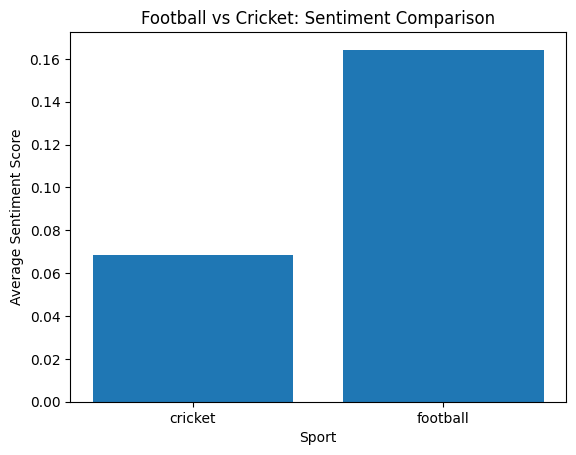

In [7]:
grouped = df.groupby("sport")["sentiment"].mean()

plt.bar(grouped.index, grouped.values)
plt.xlabel("Sport")
plt.ylabel("Average Sentiment Score")
plt.title("Football vs Cricket: Sentiment Comparison")
plt.show()
